In [1]:
from mylibrary import *
import os
#matplotlib.use('nbagg')
#     The next line is jupyter specific & only needs to be called 1/notebook.
%matplotlib inline
notebooksDir   = os.getcwd()

--------------------

<h2>Moly99 Solution Variable Properties</h2>

In [2]:
l = 1.0
h = d = 0.2
ID = 0.08
molyVol = 5.0e5                  #500kW/m^3 = 500W/L
volHeatGen = molyVol                         #W/m2 (q'')
#print("The volume of the 0.2m test cube is :", '{:.3e}'.format(molyVol))
print("The heat generation rate of 0.2m rectangular prism is :", '{:.3e}'.format(volHeatGen))
temp          = 25                                           # C
temp          = temp + 273.15                                # K
density       = 987.864 + 1.68197*temp - 0.00343*temp**2     #kg/m3 (rho)
dviscosity    = 0.030165 - 0.000167*temp + (2.37e-7)*temp**2        #Pa*s (mu)
conductivity  = 0.103116 + 0.002049*temp - 1.57e-6*temp**2   #W/m*C
specificHeat  = 3439.243 - 2.396*temp + 0.0032*temp**2       #J/kg*C
kviscosity    = dviscosity/density  #m2/s (nu)
#thermalExpansion = 87.97e-6        #1/T Volumetric(alpha or beta)
print("\n---------------------Fluid Properties @ 25 °C---------------------\n")
print("Density (rho):\t\t\t", '{:.8e}'.format(density))
print("Rhocp:\t\t\t\t", '{:.8e}'.format(density*specificHeat))
print("Conductivity (kappa or k):\t", '{:.8e}'.format(conductivity))
print("Dynamic Viscosity (mu):\t\t", '{:.8e}'.format(dviscosity))
print("Specific Heat (cp):\t\t", '{:.8e}'.format(specificHeat))

The heat generation rate of 0.2m rectangular prism is : 5.000e+05

---------------------Fluid Properties @ 25 °C---------------------

Density (rho):			 1.18443892e+03
Rhocp:				 3.56437296e+06
Conductivity (kappa or k):	 5.74462677e-01
Dynamic Viscosity (mu):		 1.44169113e-03
Specific Heat (cp):		 3.00933455e+03


In [3]:
Rex = density*0.05*0.01/dviscosity;
Pr = specificHeat*dviscosity/conductivity;
#Gr = 9.807*thermalExpansion*2*L**3/kviscosity**2;
#Rax = (9.807*thermalExpansion*2*L**3)/(kviscosity*(conductivity/(density*specificHeat)));
#Ra_flux = (9.807*thermalExpansion*flux*0.05**4)/(kviscosity*(conductivity/(density*specificHeat))*conductivity);
print("Reynolds number:", '{:.3e}'.format(Rex))
print("Prandtl number:", '{:.3e}'.format(Pr))
#print("Rayleigh number:", '{:.3e}'.format(Rax))
#print("Flux Rayleigh number(q''):", '{:.3e}'.format(Ra_flux))

Reynolds number: 4.108e+02
Prandtl number: 7.552e+00


<h3>Assign Path Info</h3>

In [32]:
os.chdir(notebooksDir)
os.chdir(r'..')
homeDir   = os.getcwd()
os.chdir(notebooksDir)  #%cd notebooks/
nekDir    = r'/Volumes/LaCieRugged/NEK5000/runs'
molyn6_500kWDir  = os.path.join(nekDir,r'molyn6-500kW')
molyn6DirLES   = os.path.join(nekDir,r'molyn6LES')

#%pwd

<h3>Get Run Log Statistics</h3>

In [33]:
#----------LES----------#
#----------------N=6----------------#
os.chdir(molyn6_500kWDir)
timeN6LES500, tempAvgN6LES500, tempRMSN6LES500 = np.genfromtxt(fname='runStatistics6LES.log', skip_header=1, usecols = (1, 3, 4), unpack=True)

#----------------N=6 ----------------#
os.chdir(molyn6DirLES)
timeN6LES, tempAvgN6LES, tempRMSN6LES = np.genfromtxt(fname='runStatistics6LES.log.backup001-300', skip_header=1, usecols = (1, 3, 4), unpack=True)
timeN6LES1, tempAvgN6LES1, tempRMSN6LES1 = np.genfromtxt(fname='runStatistics6LES.log.backup300-991', skip_header=1, usecols = (1, 3, 4), unpack=True)
timeN6LES2, tempAvgN6LES2, tempRMSN6LES2 = np.genfromtxt(fname='runStatistics6LES.log', skip_header=1, usecols = (1, 3, 4), unpack=True)


os.chdir(notebooksDir)
# command-/
# #----Combine data from restarts into single array----#
# #----------------N=6----------------#
timeN6LES    = np.append(timeN6LES, timeN6LES1)
timeN6LES    = np.append(timeN6LES, timeN6LES2)
tempAvgN6LES = np.append(tempAvgN6LES, tempAvgN6LES1)
tempAvgN6LES = np.append(tempAvgN6LES, tempAvgN6LES2)
tempRMSN6LES = np.append(tempRMSN6LES, tempRMSN6LES1)
tempRMSN6LES = np.append(tempRMSN6LES, tempRMSN6LES2)

# #----------------N=8----------------#
# timeN8LES    = np.append(timeN8LES, timeN8LES1)
# timeN8LES    = np.append(timeN8LES, timeN8LES2)
# tempAvgN8LES = np.append(tempAvgN8LES, tempAvgN8LES1)
# tempAvgN8LES = np.append(tempAvgN8LES, tempAvgN8LES2)
# tempRMSN8LES = np.append(tempRMSN8LES, tempRMSN8LES1)
# tempRMSN8LES = np.append(tempRMSN8LES, tempRMSN8LES2)

# #----------------N=10----------------#
# timeN10      = np.append(timeN10, timeN101)
# tempAvgN10   = np.append(tempAvgN10, tempAvgN101)
# tempRMSN10   = np.append(tempRMSN10, tempRMSN101)
#

<h3> Moly Plot N=6 LES</h3>

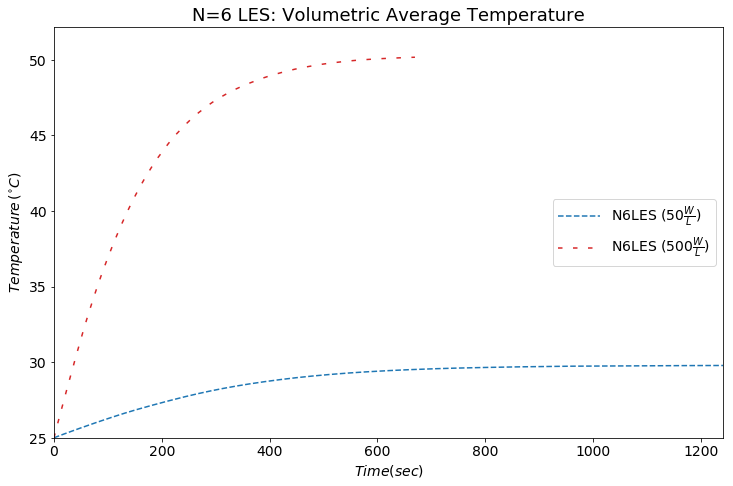

In [36]:
plt.close('all')
#    Enter x, y variables to plot:
x_var, x_var1 = timeN6LES, timeN6LES500
y_var, y_var1 = tempAvgN6LES, tempAvgN6LES500

##############       Format Plot Area      #############################
fig, ax = plt.subplots()
color = 'tab:red'
ax.set_xlim(min(x_var), max(x_var))
ax.set_ylim(min(y_var), max(y_var1+2))
#ax.set_xlim(min(120,140), max(120,140))
#ax.set_ylim(min(26.5,26.66), max(26.33,26.75))
ax.tick_params(axis='x',)
ax.tick_params(axis='y', labelsize=14)
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

##############       Set Text          #############################
ax.set_title('N=6 LES: Volumetric Average Temperature', size = 18)
ax.set_xlabel('$Time({sec})$', size = 14)#, color=color);
ax.set_ylabel(r'$Temperature\,(^{\circ}C)$', size = 14)

n6 = ax.plot(x_var,y_var, "--", label=r"N6LES $(50\frac{W}{L})$")#, linestyle=':')#, color=color)
n6_500 = ax.plot(x_var1,y_var1, linestyle='--', dashes=(3, 7), label=r"N6LES $(500\frac{W}{L})$", color=color)
ns = n6 + n6_500
labs = [l.get_label() for l in ns]
ax.legend(ns, labs, loc=7,handlelength=3, fontsize=14)

matplotlib.rc('xtick', labelsize=14)

fig.tight_layout()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 2, box.height*2])

plt.show()
#os.chdir(casesMoly)
#fig.savefig('molyAvgTemp500WperL.jpg', bbox_inches='tight', transparent=True)
#os.chdir(notebooksDir)

<h3>Computational Time Statistics</h3>

In [11]:
# import datetime
# #datetime(year,month,day,hour(24),minute,second,microsecond)
# startN6   = datetime.datetime(2018,10,29,16,21,0,0)
# endN6     = datetime.datetime(2018,10,31,0,47,0,0)
# deltaN6   = (endN6 - startN6)
# deltaN6   = ([(deltaN6.days*86400 + deltaN6.seconds)/60, 127])   #minutes
# print("Total N6DNS computational time for 127 simulation seconds:\t",'{:.3f}'.format(deltaN6[0]/(60*24)),"days")

# startN6LES   = datetime.datetime(2018,11,27,12,33,0,0)
# endN6LES     = datetime.datetime(2018,11,29,1,32,0,0)
# deltaN6LES   = (endN6LES - startN6LES)
# deltaN6LES   = ([(deltaN6LES.days*86400 + deltaN6LES.seconds)/60, 127])    #minutes
# print("Total N6LES computational time for 127 simulation seconds:\t",'{:.3f}'.format(deltaN6LES[0]/(60*24)),"days")

# startN8   = datetime.datetime(2018,11,1,11,6,0,0)
# endN8     = datetime.datetime(2018,11,3,15,15,0,0)
# deltaN8   = (endN8 - startN8)
# deltaN8   = ([(deltaN8.days*86400 + deltaN8.seconds)/60, 127])    #minutes
# print("Total N8DNS computational time for 127 simulation seconds:\t",'{:.3f}'.format(deltaN8[0]/(60*24)),"days")

# startN8LES   = datetime.datetime(2018,11,21,11,43,0,0)
# endN8LES     = datetime.datetime(2018,11,23,15,50,0,0)
# deltaN8LES   = (endN8LES - startN8LES)
# deltaN8LES   = ([(deltaN8LES.days*86400 + deltaN8LES.seconds)/60, 127])    #minutes
# print("Total N8LES computational time for 127 simulation seconds:\t",'{:.3f}'.format(deltaN8LES[0]/(60*24)),"days")

# startN10   = datetime.datetime(2018,11,5,8,34,0,0)
# endN10     = datetime.datetime(2018,11,11,22,3,0,0)
# deltaN10   = (endN10 - startN10)
# deltaN10   = ([(deltaN10.days*86400 + deltaN10.seconds)/60, 127])  #minutes
# print("Total N10DNS computational time for 127 simulation seconds:\t", '{:.3f}'.format(deltaN10[0]/(60*24)),"days")

# startN10LES   = datetime.datetime(2018,12,12,18,31,0,0)
# endN10LES     = datetime.datetime(2018,12,18,1,43,0,0)
# deltaN10LES   = (endN10LES - startN10LES)
# deltaN10LES   = ([(deltaN10LES.days*86400 + deltaN10LES.seconds)/60, 127])  #minutes
# print("Total N10LES computational time for 127 simulation seconds:\t", '{:.3f}'.format(deltaN10LES[0]/(60*24)),"days")


In [16]:
print("The max differences are:\n",max(y_var[:]),"\n",max(y_var1[:]),"\n",max(y_var2[:]))
print("The min differences are:\n",min(y_var[:]),"\n",min(y_var1[:]),"\n",min(y_var2[:]))
max(abs(max(max(y_var), max(y_var1), max(y_var2))), abs(max(min(y_var), min(y_var1), min(y_var2))))*100/25
max(abs(max(max(y_var), max(y_var1), max(y_var2))), abs(max(min(y_var), min(y_var1), min(y_var2))))

The max differences are:
 4.0000000002038405e-05 
 0.002029999999997756 
 0.0007300000000007856
The min differences are:
 -3.0000000002416982e-05 
 -0.0008499999999997954 
 -0.0041399999999995885


0.002029999999997756

<h3>Computational Time Statistics</h3>

In [20]:
import datetime
#datetime(year,month,day,hour(24),minute,second,microsecond)
startN6   = datetime.datetime(2018,10,29,16,21,0,0)
endN6     = datetime.datetime(2018,10,31,0,47,0,0)
deltaN6   = (endN6 - startN6)
deltaN6   = ([(deltaN6.days*86400 + deltaN6.seconds)/60, 127])   #minutes
print("Total N6DNS computational time for 127 simulation seconds:\t",'{:.3f}'.format(deltaN6[0]/(60*24)),"days")

startN6LES   = datetime.datetime(2018,11,27,12,33,0,0)
endN6LES     = datetime.datetime(2018,11,29,1,32,0,0)
deltaN6LES   = (endN6LES - startN6LES)
deltaN6LES   = ([(deltaN6LES.days*86400 + deltaN6LES.seconds)/60, 127])    #minutes
print("Total N6LES computational time for 127 simulation seconds:\t",'{:.3f}'.format(deltaN6LES[0]/(60*24)),"days")

startN8   = datetime.datetime(2018,11,1,11,6,0,0)
endN8     = datetime.datetime(2018,11,3,15,15,0,0)
deltaN8   = (endN8 - startN8)
deltaN8   = ([(deltaN8.days*86400 + deltaN8.seconds)/60, 127])    #minutes
print("Total N8DNS computational time for 127 simulation seconds:\t",'{:.3f}'.format(deltaN8[0]/(60*24)),"days")

startN8LES   = datetime.datetime(2018,11,21,11,43,0,0)
endN8LES     = datetime.datetime(2018,11,23,15,50,0,0)
deltaN8LES   = (endN8LES - startN8LES)
deltaN8LES   = ([(deltaN8LES.days*86400 + deltaN8LES.seconds)/60, 127])    #minutes
print("Total N8LES computational time for 127 simulation seconds:\t",'{:.3f}'.format(deltaN8LES[0]/(60*24)),"days")

startN10   = datetime.datetime(2018,11,5,8,34,0,0)
endN10     = datetime.datetime(2018,11,11,22,3,0,0)
deltaN10   = (endN10 - startN10)
deltaN10   = ([(deltaN10.days*86400 + deltaN10.seconds)/60, 127])  #minutes
print("Total N10DNS computational time for 127 simulation seconds:\t", '{:.3f}'.format(deltaN10[0]/(60*24)),"days")

startN10LES   = datetime.datetime(2018,12,12,18,31,0,0)
endN10LES     = datetime.datetime(2018,12,18,1,43,0,0)
deltaN10LES   = (endN10LES - startN10LES)
deltaN10LES   = ([(deltaN10LES.days*86400 + deltaN10LES.seconds)/60, 127])  #minutes
print("Total N10LES computational time for 127 simulation seconds:\t", '{:.3f}'.format(deltaN10LES[0]/(60*24)),"days")


Total N6DNS computational time for 127 simulation seconds:	 1.351 days
Total N6LES computational time for 127 simulation seconds:	 1.541 days
Total N8DNS computational time for 127 simulation seconds:	 2.173 days
Total N8LES computational time for 127 simulation seconds:	 2.172 days
Total N10DNS computational time for 127 simulation seconds:	 6.562 days
Total N10LES computational time for 127 simulation seconds:	 5.300 days


In [22]:
steps = np.array([0.01,0.1,0.25]);
fprime = ([
    ( sin(0.626*pi+steps) - sin(0.626*pi-steps) )/(2*steps)    
    ,( -sin(0.626*pi+2*steps) + 8*sin(0.626*pi+steps) - 8*sin(0.626*pi-steps) + sin(0.626*pi-2*steps) )/(12*steps)
    ])
print(fprime)

[array([-0.38557757, -0.38494167, -0.38158003]), array([-0.38558399, -0.38558271, -0.38553416])]


In [23]:
fprime-cos(0.626*pi)

array([[6.42636774e-06, 6.42318744e-04, 4.00396702e-03],
       [1.28524635e-10, 1.28375077e-06, 4.98340494e-05]])

In [ ]:
cos()